# Midterm

Ok, we've reviewed a lot so far, so before we continue onto more specific kinds of analysis, using LLMs, and machine learning, complete this notebook that builds on the lessons in this series on pandas and EDA.

___

## Dataset
### *The Pudding*'s Film Dialogue Data

The dataset that we're working with in this lesson is taken from Hannah Andersen and Matt Daniels's *Pudding* essay, ["Film Dialogue from 2,000 screenplays, Broken Down by Gender and Age"](https://pudding.cool/2017/03/film-dialogue/). The dataset provides information about 2,000 films from 1925 to 2015, including characters’ names, genders, ages, how many words each character spoke in each film, the release year of each film, and how much money the film grossed. They included character gender information because they wanted to contribute data to a broader conversation about how "white men dominate movie roles."

___

## Import Pandas

In [2]:
import pandas as pd
pd.options.display.max_rows = 200

## Import the Data

In [42]:
film_df = pd.read_csv('../data/Pudding/Pudding-Film-Dialogue-Clean.csv', delimiter=",", encoding='utf-8')

## Overview

To look at a random *n* number of rows in a DataFrame, we can use a method called `.sample()`.

In [4]:
film_df.sample(10)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
7111,The Grapes of Wrath,1940,Al,man,964,0.041218,29.0,NaN,2442
16511,Wadjda,2012,Father,man,254,0.032518,NaN,1.0,5509
11807,Thir13en Ghosts,2001,Dennis Rafkin,man,1666,0.238614,31.0,64.0,3776
8731,Manhattan Murder Mystery,1993,Carol Lipton,woman,7750,0.342314,47.0,23.0,2846
10789,The Surfer King,2006,Amy,woman,446,0.028001,NaN,NaN,3473
22135,Southland Tales,2006,Robinson,woman,132,0.012864,NaN,NaN,8634
15002,Stalag 17,1953,Duke,man,805,0.057304,33.0,NaN,5022
10232,Sex and the City,2008,Valentine'S Nig,woman,152,0.005012,NaN,185.0,3300
4314,As Good as It Gets,1997,Carol Connelly,woman,7386,0.303726,34.0,280.0,1702
17990,The Hundred-Foot Journey,2014,Mama,woman,440,0.074526,47.0,57.0,6634


Generate information about all the columns in the data 

In [5]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23047 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23047 non-null  object 
 1   release_year            23047 non-null  int64  
 2   character               23047 non-null  object 
 3   gender                  23047 non-null  object 
 4   words                   23047 non-null  int64  
 5   proportion_of_dialogue  23047 non-null  float64
 6   age                     18262 non-null  float64
 7   gross                   19386 non-null  float64
 8   script_id               23047 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.6+ MB


Just like Python has different data types, Pandas has different data types, too. These data types are automatically assigned to columns when we read in a CSV file. We can check these Pandas data types with the [`.dtypes` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

Make a histogram of the DataFrame

array([[<Axes: title={'center': 'release_year'}>,
        <Axes: title={'center': 'words'}>],
       [<Axes: title={'center': 'proportion_of_dialogue'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'gross'}>,
        <Axes: title={'center': 'script_id'}>]], dtype=object)

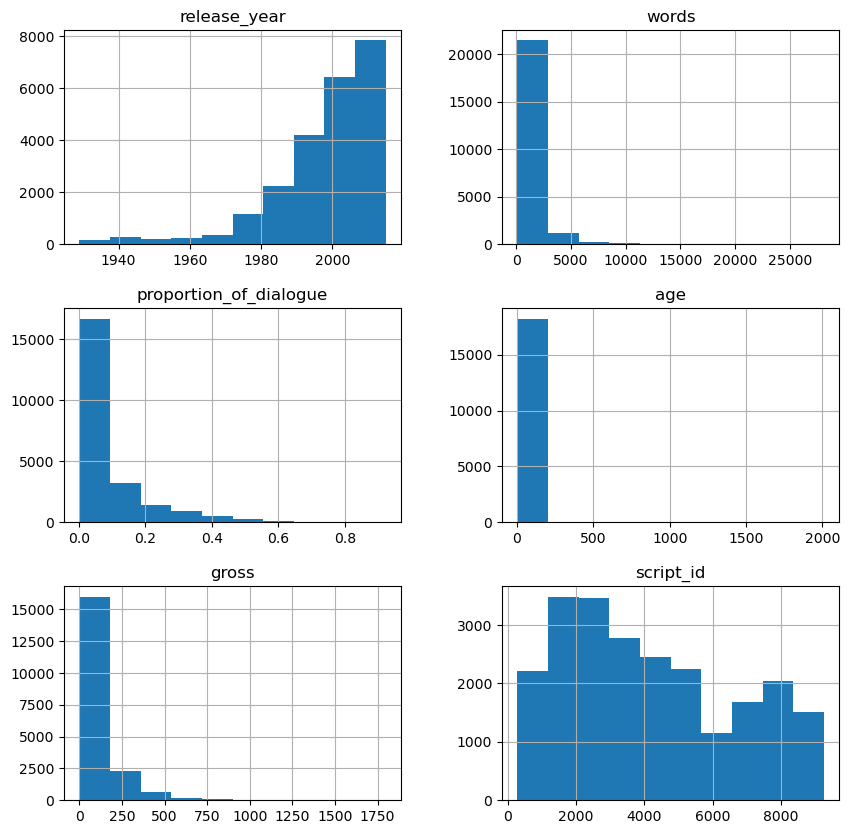

In [6]:
film_df.hist(figsize=(10,10))

Generate descriptive statistics for all the columns in the data 

In [7]:
film_df.describe(include='all')

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
count,23047,23047.000000,23047,23047,23047.000000,23047.000000,18262.000000,19386.000000,23047.000000
unique,1994,NaN,17543,3,NaN,NaN,NaN,NaN,NaN
top,Lone Star,NaN,Doctor,man,NaN,NaN,NaN,NaN,NaN
freq,40,NaN,37,16131,NaN,NaN,NaN,NaN,NaN
mean,NaN,1998.132425,NaN,NaN,907.902634,0.086518,42.275052,106.735428,4194.804486
std,NaN,14.746052,NaN,NaN,1399.616135,0.107746,57.912595,145.861933,2473.037601
min,NaN,1929.000000,NaN,NaN,101.000000,0.001537,3.000000,0.000000,280.000000
25%,NaN,1992.000000,NaN,NaN,193.000000,0.019773,30.000000,22.000000,2095.000000
50%,NaN,2001.000000,NaN,NaN,396.000000,0.042423,39.000000,56.000000,3694.000000
75%,NaN,2009.000000,NaN,NaN,980.000000,0.104171,50.000000,136.000000,6224.500000


### ❓ What patterns or outliers do you notice?

ENTER YOUR RESPONSE

## Drop Rows

In [8]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
4024,American Psycho,2000,Harold Carnes,man,434,0.025271,2000.0,24.0,1639
5254,Case 39,2009,Margaret Sulliv,woman,310,0.037944,2009.0,15.0,1962
5370,Chaos,2005,Bernie Callo,man,244,0.015051,2005.0,NaN,1985
5950,The Departed,2006,Realtor,man,148,0.005575,2006.0,175.0,2144
6899,Get Carter,2000,Thorpey,man,133,0.026552,2000.0,24.0,2380
7787,Into the Wild,2007,Bull,man,188,0.009936,2007.0,23.0,2625
7968,Jay and Silent Bob Strike Back,2001,Silent Bob'S Mo,woman,224,0.009292,2001.0,46.0,2673
9233,Never Been Kissed,1999,Monty Malik,man,104,0.005219,1999.0,95.0,2986
9617,The Piano,1993,Nessie,woman,116,0.012262,1993.0,84.0,3095
9819,Raging Bull,1980,Reporter,man,300,0.013364,1980.0,NaN,3169


If you want to double check, you can examine the [data that the Pudding shared here](https://github.com/matthewfdaniels/scripts/blob/graphs/character_list5.csv) (you can control + F to search for specific characters).

In [37]:
film_df = film_df.drop(film_df[film_df['age'] > 100].index) 

In [10]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23031 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23031 non-null  object 
 1   release_year            23031 non-null  int64  
 2   character               23031 non-null  object 
 3   gender                  23031 non-null  object 
 4   words                   23031 non-null  int64  
 5   proportion_of_dialogue  23031 non-null  float64
 6   age                     18246 non-null  float64
 7   gross                   19373 non-null  float64
 8   script_id               23031 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.8+ MB


In [11]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id


## Rename Columns

In [38]:
film_df = film_df.rename(columns={'imdb_character_name': 'character', 'year': 'release_year'})

In [39]:
film_df.head()

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
7789,Into the Wild,2007,Chris Mccandles,man,6386,0.337491,22.0,23.0,2625
7788,Into the Wild,2007,Carine Mccandle,woman,4462,0.235810,23.0,23.0,2625
7795,Into the Wild,2007,Ron Franz,man,2118,0.111933,82.0,23.0,2625
7800,Into the Wild,2007,Wayne Westerber,man,1646,0.086989,37.0,23.0,2625
7794,Into the Wild,2007,Rainey,man,1086,0.057394,NaN,23.0,2625


## Filter

Find a specific film that you're intersted and then filter the DataFrame for only rows relevant to that film. 

If you want to search for films by decade and genre, you can [search the with the Pudding's handy data viz here](https://pudding.cool/2017/03/film-dialogue/embed.html).

In [20]:
film_filter = film_df['title'] == 'Into the Wild'

If you want to sort by characters who speak the most, feel free to add `.sort_values(by='words', ascending=False)`

In [21]:
film_df[film_filter]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
7785,Into the Wild,2007,Billie Mccandle,woman,286,0.015115,48.0,23.0,2625
7786,Into the Wild,2007,Brown Bronco Dr,man,156,0.008244,NaN,23.0,2625
7788,Into the Wild,2007,Carine Mccandle,woman,4462,0.235810,23.0,23.0,2625
7789,Into the Wild,2007,Chris Mccandles,man,6386,0.337491,22.0,23.0,2625
7790,Into the Wild,2007,Gail Borah,woman,208,0.010992,NaN,23.0,2625
7791,Into the Wild,2007,Jan Burres,woman,1048,0.055385,48.0,23.0,2625
7792,Into the Wild,2007,Lori,woman,176,0.009301,27.0,23.0,2625
7793,Into the Wild,2007,Mads,man,438,0.023148,33.0,23.0,2625
7794,Into the Wild,2007,Rainey,man,1086,0.057394,NaN,23.0,2625
7795,Into the Wild,2007,Ron Franz,man,2118,0.111933,82.0,23.0,2625


Now pick a character from this film (or another character) and filter the DataFrame by character.

In [23]:
character_filter = film_df['character'] == 'Carine Mccandle'

In [24]:
film_df[character_filter]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
7788,Into the Wild,2007,Carine Mccandle,woman,4462,0.23581,23.0,23.0,2625


### ❓ How does this data align with your experience/knowledge of the film?

I've never watched 'Into the Wild', but I did read the book, and I can see why this character would have 23% of the dialogue in the movie. She is, after all, the main character's mother. I believe the movie (though I may be wrong about it) takes the same perspective as the book in that much of the narration of the main character comes from the surrounding characters. 

### ❓ How do these specific examples influence your thoughts about the data collection and categorization process? What would you have done differently (if anything)?

I made sure that the example I picked had no missing values. I wouldn't have changed anything, probably, though Into The Wild is a recent movie. Had I picked an older movie, say, from the 80s, then I might've scrutinized the data more for missing values and to understand the proportion of the dialogue along gender lines. 

## Sort Values

Sort the DataFrame from the character who has the highest `proportion_of_dialogue` to the lowest.  Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [36]:
film_df[film_filter].sort_values(by='proportion_of_dialogue', ascending=False)[:20]

C:\Users\cradd\AppData\Local\Temp\ipykernel_18076\3902019491.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  film_df[film_filter].sort_values(by='proportion_of_dialogue', ascending=False)[:20]


,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
7789,Into the Wild,2007,Chris Mccandles,man,6386,0.337491,22.0,23.0,2625
7788,Into the Wild,2007,Carine Mccandle,woman,4462,0.235810,23.0,23.0,2625
7795,Into the Wild,2007,Ron Franz,man,2118,0.111933,82.0,23.0,2625
7800,Into the Wild,2007,Wayne Westerber,man,1646,0.086989,37.0,23.0,2625
7794,Into the Wild,2007,Rainey,man,1086,0.057394,NaN,23.0,2625
7791,Into the Wild,2007,Jan Burres,woman,1048,0.055385,48.0,23.0,2625
7793,Into the Wild,2007,Mads,man,438,0.023148,33.0,23.0,2625
7785,Into the Wild,2007,Billie Mccandle,woman,286,0.015115,48.0,23.0,2625
7796,Into the Wild,2007,Social Worker,woman,252,0.013318,NaN,23.0,2625
7790,Into the Wild,2007,Gail Borah,woman,208,0.010992,NaN,23.0,2625


Sort the DataFrame from the character who has the lowest `proportion_of_dialogue` to the highest. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [30]:
film_df[film_filter].sort_values(by='proportion_of_dialogue', ascending=True).head(20)

C:\Users\cradd\AppData\Local\Temp\ipykernel_18076\4074800848.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  film_df[film_filter].sort_values(by='proportion_of_dialogue', ascending=True).head(20)


,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
7797,Into the Wild,2007,Sonja,woman,126,0.006659,27.0,23.0,2625
7786,Into the Wild,2007,Brown Bronco Dr,man,156,0.008244,NaN,23.0,2625
7798,Into the Wild,2007,Tracy Tatro,woman,160,0.008456,17.0,23.0,2625
7792,Into the Wild,2007,Lori,woman,176,0.009301,27.0,23.0,2625
7799,Into the Wild,2007,Walt Mccandless,man,186,0.009830,57.0,23.0,2625
7790,Into the Wild,2007,Gail Borah,woman,208,0.010992,NaN,23.0,2625
7796,Into the Wild,2007,Social Worker,woman,252,0.013318,NaN,23.0,2625
7785,Into the Wild,2007,Billie Mccandle,woman,286,0.015115,48.0,23.0,2625
7793,Into the Wild,2007,Mads,man,438,0.023148,33.0,23.0,2625
7791,Into the Wild,2007,Jan Burres,woman,1048,0.055385,48.0,23.0,2625


Sort the DataFrame from the character who speaks the least number of `words` to the character who speaks the most number of words. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [32]:
film_df[film_filter].sort_values(by='words', ascending=False).head(20)

C:\Users\cradd\AppData\Local\Temp\ipykernel_18076\88273330.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  film_df[film_filter].sort_values(by='words', ascending=False).head(20)


,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
7789,Into the Wild,2007,Chris Mccandles,man,6386,0.337491,22.0,23.0,2625
7788,Into the Wild,2007,Carine Mccandle,woman,4462,0.235810,23.0,23.0,2625
7795,Into the Wild,2007,Ron Franz,man,2118,0.111933,82.0,23.0,2625
7800,Into the Wild,2007,Wayne Westerber,man,1646,0.086989,37.0,23.0,2625
7794,Into the Wild,2007,Rainey,man,1086,0.057394,NaN,23.0,2625
7791,Into the Wild,2007,Jan Burres,woman,1048,0.055385,48.0,23.0,2625
7793,Into the Wild,2007,Mads,man,438,0.023148,33.0,23.0,2625
7785,Into the Wild,2007,Billie Mccandle,woman,286,0.015115,48.0,23.0,2625
7796,Into the Wild,2007,Social Worker,woman,252,0.013318,NaN,23.0,2625
7790,Into the Wild,2007,Gail Borah,woman,208,0.010992,NaN,23.0,2625


### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

In this movie, generally speaking, most of the main dialogue comes from men. However, important figures like the main character's mother also has a great proportion of the overall dialogue. This is a decently split movie in comparison to other movies. 

## Groupby

Group by film and then calculate the sum total for every column.

In [96]:
film_df = pd.read_csv('../data/Pudding/Pudding-Film-Dialogue-Clean.csv', delimiter=",", encoding='utf-8')
film_df = film_df.drop(film_df[film_df['age'] > 100].index) 
film_df = film_df.rename(columns={'imdb_character_name': 'character', 'year': 'release_year'})

film_df.groupby('title').sum()

C:\Users\cradd\AppData\Local\Temp\ipykernel_18076\1068721809.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  film_df.groupby('title').sum()


,release_year,words,proportion_of_dialogue,age,gross,script_id
title,,,,,,
(500) Days of Summer,26117,18500,1.0,378.0,481.0,19942
10 Things I Hate About You,23988,19680,1.0,307.0,780.0,18144
12 Years a Slave,56364,19628,1.0,712.0,1680.0,42476
12 and Holding,30075,15968,1.0,513.0,0.0,22710
127 Hours,8040,5145,1.0,114.0,80.0,6080
...,...,...,...,...,...,...
Zero Effect,13986,13927,1.0,227.0,21.0,57106
Zerophilia,16040,16686,1.0,160.0,0.0,30144
Zodiac,62217,14656,1.0,1071.0,1271.0,201221


Group by film, isolate the `words` column, and then calculate the sum total for every column.

In [97]:
film_df.groupby('title')[['words']].sum()

,words
title,
(500) Days of Summer,18500
10 Things I Hate About You,19680
12 Years a Slave,19628
12 and Holding,15968
127 Hours,5145
...,...
Zero Effect,13927
Zerophilia,16686
Zodiac,14656


Group by film AND gender, isolate the column `words`, and then calculate the sum total for every column.

*Note: Remember that to group by multiple columns, you need to put the column names in square brackets `[]`.*

In [98]:
film_df.groupby(['title', 'gender'])[['words']].sum()

words
title                      gender       
(500) Days of Summer       man     12762
                           woman    5738
10 Things I Hate About You man     10688
                           woman    8992
12 Years a Slave           man     16176
...                                  ...
Zodiac                     woman    1421
eXistenZ                   man      5695
                           woman    3752
xXx                        man      7287
                           woman     998

[3936 rows x 1 columns]

## Filter, Then Groupby

Filter the DataFrame for only characters labeled as `woman`

In [99]:
women_filter = film_df['gender'] == 'woman'

In [100]:
women_film_df = film_df[women_filter]

Filter the DataFrame for only characters labeled as `man`

In [101]:
men_filter = film_df['gender'] == 'man'

In [102]:
men_film_df = film_df[men_filter]

Now group `women_film_df` by film, isolate the `words` column, and sum the `words` spoken by women.

In [103]:
women_film_df.groupby('title')['words'].sum()

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Assign this Series to a new variable `women_by_film`

In [104]:
women_by_film = women_film_df.groupby('title')['words'].sum()
women_by_film

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Using the same construction, make a new another new variable `men_by_film`

In [105]:
men_by_film = men_film_df.groupby('title')['words'].sum()
men_by_film

title
(500) Days of Summer          12762
10 Things I Hate About You    10688
12 Years a Slave              16176
12 and Holding                10644
127 Hours                      4336
                              ...  
Zero Effect                   11711
Zerophilia                    12074
Zodiac                        13235
eXistenZ                       5695
xXx                            7287
Name: words, Length: 1992, dtype: int64

Sort `women_by_film` from the film with the most words to the film with the least words. Then examine the top 20 values.

In [106]:
women_by_film.sort_values(ascending=False)[:20]

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Assign this sorted list of movies to the variable `top20_women`

In [107]:
top20_women = women_by_film.sort_values(ascending=False)[:20]
top20_women

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Using the same construction, make a new variable `top20_men`

In [108]:
top20_men = men_by_film.sort_values(ascending=False)[:20]
top20_men

title
Casino                    57944
JFK                       50752
A Few Good Men            36484
Funny People              36278
Magnolia                  33024
High Fidelity             31114
The Dark Knight           30290
Troy                      29712
Gran Torino               29092
Life                      27748
Observe and Report        27534
Apt Pupil                 27428
Analyze This              26548
The Hangover              26538
Mr. Deeds Goes to Town    26508
Wall Street               26440
Jackie Brown              25984
Sling Blade               24964
Meet John Doe             24520
Clerks                    24428
Name: words, dtype: int64

### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

Men speak about 2x as many words for every word a woman speaks on TV, even on the highest rated shows. 

## Saving Plots

Make a bar chart of `top20_women`. Give the chart a title, and specify a color.

<Axes: title={'center': 'Top 20 Media With Most Dialogue By Women'}, xlabel='title'>

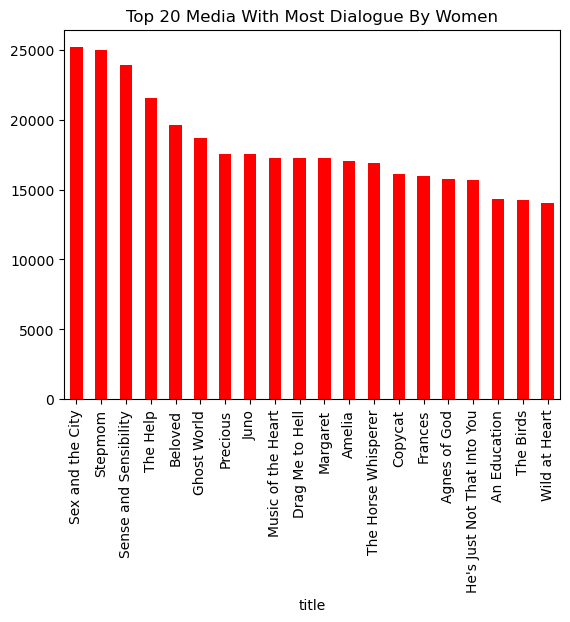

In [109]:
top20_women.plot(
    kind='bar', 
    title="Top 20 Media With Most Dialogue By Women",
    color='red',
    # Add your code/parameters
)

To save the plot, you can use `ax.figure.savefig()` and the name of the file in quotation marks.

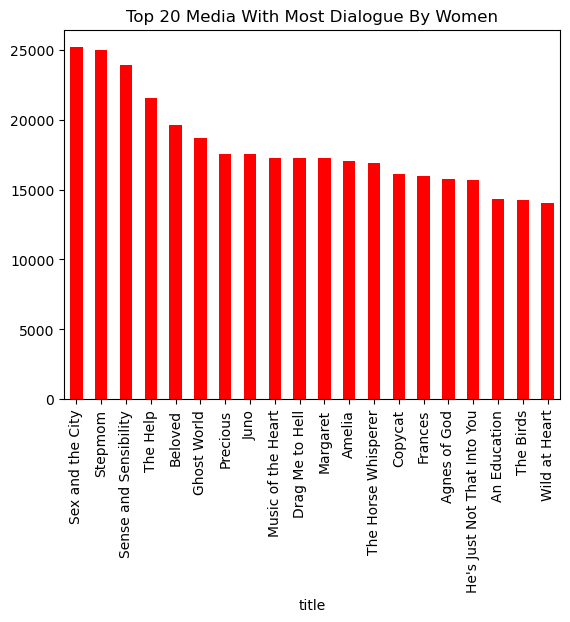

In [110]:
ax = top20_women.plot(
    kind='bar',
    title="Top 20 Media With Most Dialogue By Women",
    color='red',
)
ax.figure.savefig('./figures/top20_women.png')

Look in the file browser on the left and double click the PNG file. How does it look? Uh oh!

Sometimes parts of a plot will get cut off when you save it. To fix this issue, you can use a function from the Matplotlib library called `plt.tight_layout()`, which will adjust the plot before you save it.

To use this function, you need to `import matplotlib.pyplot as plt`.

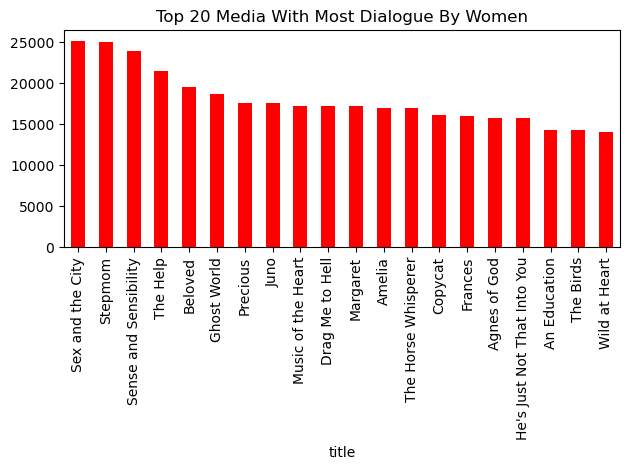

In [111]:
import matplotlib.pyplot as plt

ax = top20_women.plot(kind='bar', title="Top 20 Media With Most Dialogue By Women", color='red')
plt.tight_layout()
ax.figure.savefig('top20_women.png')

## Scatter Plots and Line Plots

Let's make a scatter plot that shows how many words women and men speak based on their age.

In [112]:
women_film_df.groupby('age')['words'].sum().reset_index()

,age,words
0,4.0,272
1,5.0,132
2,6.0,2406
3,7.0,8158
4,8.0,3260
5,9.0,6540
6,10.0,11771
7,11.0,11462
8,12.0,17316
9,13.0,12580


In [113]:
women_age_words = women_film_df.groupby('age')['words'].sum().reset_index()

In [114]:
men_age_words = men_film_df.groupby('age')['words'].sum().reset_index()

<Axes: xlabel='age', ylabel='words'>

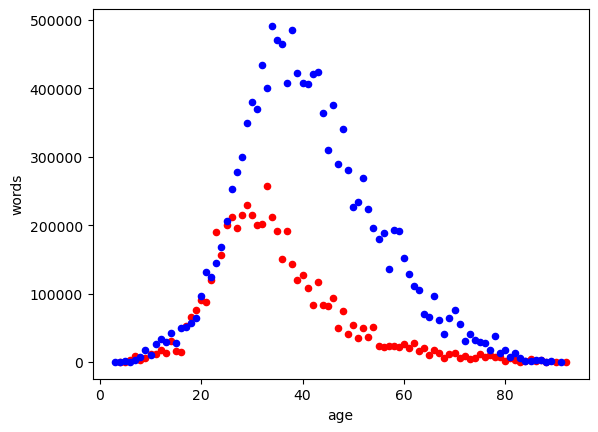

In [115]:
ax = women_age_words.plot(kind='scatter', x='age', y='words', color='red')
men_age_words.plot(ax=ax, kind='scatter', x='age', y='words', color='blue')

Now let's make a line plot of the exact same data. Copy and paste the code in the cell above and change it to produce a line plot instead of a scatter plot.

<Axes: xlabel='age'>

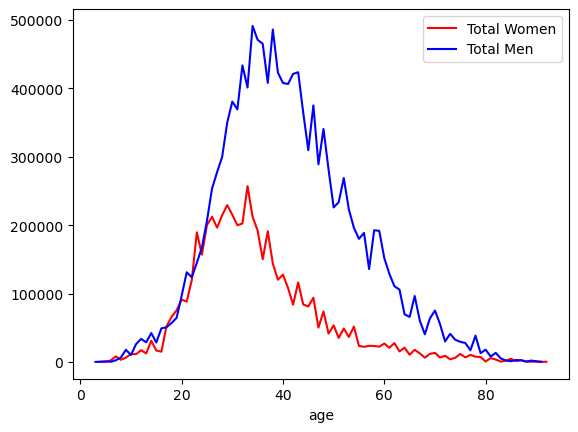

In [120]:
ax = women_age_words.plot(kind='line', x='age', y='words', color='red', label="Total Women")
men_age_words.plot(ax=ax, kind='line', x='age', y='words', color='blue', label="Total Men")

## Reflection

Write about 250-500 words in response to each question below.

### 1. Discuss your impressions of EDA techniques?

EDA Techniques are great for exploring datasets, and they can easily manipulate large groups of data for the results you're trying to find. Not only that, they can easily shortcut the creation of data plots with them. It's efficient for parsing through a large scope of data. However, there are still gaps in the original datasets where our EDA techniques are applied. We can clean these up, though it's important to remain intentional while parsing through data. Having ways to visualize data in a clear fashion makes EDA techniques both interesting and an incredible tool. 

I really enjoyed getting to write down a few lines of code just to minimize the data being shown. It was fun seeing how you could investigate tons of correlations with the data provided. It is, of course, a process I had to remind myself that was efficient but could still retain flaws from within the dataset. However, upon doing job and internship research this past summer, I realized that python, the panda imports, and EDA analysis was a huge real-world skill. For example, I found a summer internship where students were expected to use EDA techniques to help parse through cancer statistics at a research center at a hospital. The practical applications of EDA techniques are diverse and incredibly important. 

Overall, as someone who genuinely enjoys statistics, I find myself very excited by the techniques and possibilities EDA provides. There is always the concern of ethics of expediency and what might get lost when parsing through large data sets, but I can also see how these techniques can provide insights into complex subjects. These techniques are also great for making available easily-digestible data to the greater public. While that concept alone comes with a great discussion on ethics and the dubiousness of statistics (the quote 'statistics can be manipulated to prove any point' is a very poignant phrase), the disparity between the greater public and research in STEM is a bridge that is still in development. Researchers are not always good at researching the topics important to most everyday people, and researchers are especially bad at conveying their findings and making those results widely known. This makes it very easy for misinformation to spread— and for important studies to get buried or never seen by most everyday people outside of the related field. 

It's not just important to be able to analyze data, but to make that analysis easily understood without sacrificing the complexity of the subject. EDA techniques provide great plots that can provide visual feedback. Paired with the right written analysis, EDA can be a great way to convey information. 

### 2. What were some of the hurdles that you encountered moving through the EDA process?

The smaller hurdles were just learning how to code with the EDA techniques. However, past debugging, it was also understanding how to clean up the datasets, and how to create and store different data and compile them together to retrieve the intended result. Cleaning up datasets meant being able to identify outliers and duplicates, and knowing how to remove them from the data set for further calculations. Knowing how to build the final data set was also a hurdle. How can you analyze a large data set for a specific question (ie. How much dialogue do men vs. women speak in films)? It takes a lot of thought to puzzle out the data that's singled out. With the scaffolding of the notebook itself, this process wasn't as difficult, though it would be to someone with limited experience. How can you isolate the data of men vs. women in each film, and the amount/proportion of words that each gender spoke? 

Additionally, while building the actual plots to represent the data selected, there were hurdles in making sure it accurately tells the right story. The notebooks guide us through the process and told us to use a line graph, which was sufficient for the purposes of this exercise, but it's a general hurdle to know which graph would best present the data. Additionally, a specific hurdle I had with the graphs was that they included the outliers that we had omitted earlier in the exercise, which meant that the graphs were practically unreadable. I had to go back and redefine the dataset to make sure I was presenting the right information. 

### 3. Explain why you chose some of the variables and questions to pursue. Also, what questions would you explore next, and why.

The film I specifically chose— 'Into the Wild'— was honestly just the first movie I researched that I recognized. Having read the book, however, I was curious about the statistics in the movie. The narration in the book is layered and complex. The narrator, an unrelated journalist (and survivalist on the side), tells the story of a boy, McCandless, who ran away from home with nothing but the clothes on his back and a backpack to go explore 'the wild'. It tells of the adventures of McCandless. 

McCandless is a real figure who was found dead in Alaska after becoming deathly ill and starving to death. He was trapped from civilization from a raging river from the abandoned complex where he was living. He hunted his own food and made his own clothes, and he survived for months (perhaps years) on his own before the winter storm hit and he fell ill. 

The narrator, a survivalist himself, tells the story with references to his own near-death experiences on several of his own explorations. The author narrates from the perspective of several people who met McCandless on his adventures— friends, mentors, etc— that the author interviewed in preparation for writing the book. The layering of dialogue and narration is very complex in the book, and one I still am fascinating by. 

So I was interested in the movie adaptation, and how it would translate. I was surprised to hear that McCandless mother had the second greatest dialogue proportion in the movie. In the book, she was a distant figure who only had a small part to say at the end of the novel. 

I was also interested in Into the Wild because the book was adapted during my childhood years, and I wanted to see the average proportion of dialogue when I was a kid vs. now, where there's more conversation about equal roles for men and women. I remember as a kid most of the shows I watched were male-dominated, unless they were Disney movies with princess leads. Perhaps Into the Wild was not the best example— perhaps it is! It was interesting nonetheless. 

In the future, I think I would like to use these techniques for potential professional work. I do a lot of writing on my own, though, so I think it would be interesting to analyze some of my works utilizing EDA techniques. There's a lot of different possibilities that I would love to play with. 